In [1]:
from __future__ import division
from neuron import h, gui
import matplotlib.pyplot as plt
plt.ion()

### Build model, run sim, plot results, extend model and do again

In [2]:
dend = h.Section(name="dend")
dend.L = 500  # um
dend.diam = 1  # um
dend.Ra = 100  # ohm*cm
dend.insert('pas')
dend.g_pas = 1/10000

h("forall { nseg = int((L/(0.1*lambda_f(100))+0.9)/2)*2 + 1 }")  # set the number of segments

1

In [3]:
# add a synapse (to the dendrite)
synapse = h.Exp2Syn(dend(1))
synapse.tau1 = 0.3
synapse.tau2 = 1.8
stim = h.NetStim()
stim.number = 1
stim.noise = 0 # no noise 
stim.interval = 1
net_con = h.NetCon(stim, synapse)
net_con.weight[0]= 0.0004

In [4]:
# set up recording
dend_vs = []
for seg in dend:
    dend_vs.append(h.Vector())
    dend_vs[-1].record(seg._ref_v)
t = h.Vector()
I = h.Vector()
I.record(synapse._ref_i)  
t.record(h._ref_t)  # record time

Vector[22]

In [5]:
# run simulation
h.v_init = -70  # set starting voltage 
h.tstop = 150  # set simulation time
h.run();  # run simulation

Text(0.5, 1.0, 'Attenuation in a passive cable')

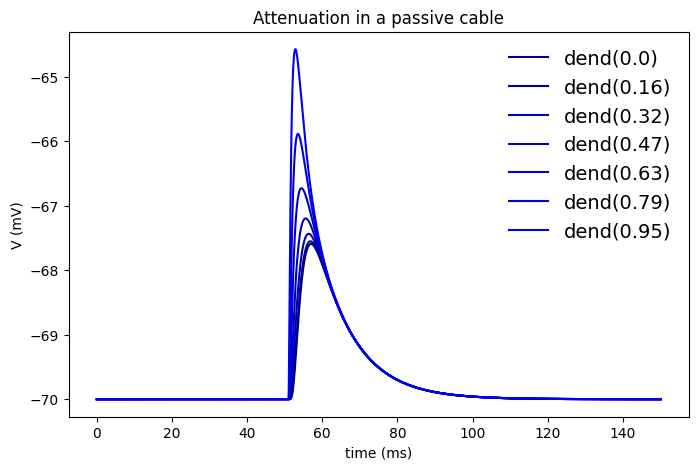

In [6]:
# plot the results
plt.figure(figsize=(8, 5))
for i, v in list(enumerate(dend_vs))[::3]:
    plt.plot(t, v, color=(0,0,0.5+0.5*i/len(dend_vs)), 
             label='dend('+str(round(i/len(dend_vs), 2))+')')
plt.legend(fontsize=14, frameon=False)
plt.xlabel("time (ms)")
plt.ylabel("V (mV)")
plt.title("Attenuation in a passive cable")

In [7]:
# Extend model with a soma
soma  = h.Section(name="soma")
soma.L = 10 # um
soma.diam = 10 # um
soma.Ra = 100
soma.insert('pas')
soma.g_pas = 1/10000  # 1/Rm - Rm ohm*cm^2
dend.connect(soma, 1, 0)  # connect the end of the soma

dend

In [8]:
# set up recordings
soma_v = h.Vector()  # set up a recording vector
soma_v.record(soma(0.5)._ref_v) # record voltage at the middle of the soma
# record voltage from all segments in the dendrite
dend_vs = []
for seg in dend:
    dend_vs.append(h.Vector())
    dend_vs[-1].record(seg._ref_v)
t = h.Vector()
t.record(h._ref_t)  # record time

Vector[44]

Text(0.5, 1.0, 'Attenuation in a passive cable with soma')

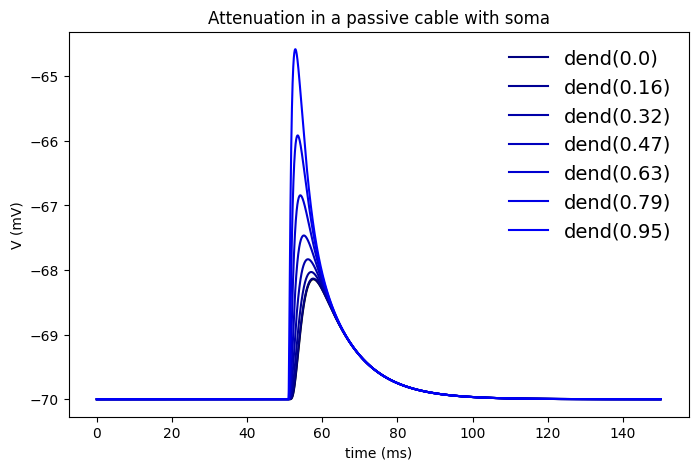

In [9]:
h.run();
# plot the results
plt.figure(figsize=(8, 5))
plt.plot(t, soma_v, color="k")
for i,v in list(enumerate(dend_vs))[::3]:
    plt.plot(t, v, color=(0,0,0.5+0.5*i/len(dend_vs)), 
             label='dend('+str(round(i/len(dend_vs), 2))+')')
plt.legend(fontsize=14, frameon=False)
plt.xlabel("time (ms)")
plt.ylabel("V (mV)")
plt.title("Attenuation in a passive cable with soma")

In [10]:
# add a synapse (to the soma)
synapse = h.Exp2Syn(soma(0.5))
synapse.tau1 = 0.3
synapse.tau2 = 1.8
stim = h.NetStim()
stim.number = 1
stim.noise = 0 # no noise 
stim.interval = 1
net_con = h.NetCon(stim, synapse)
net_con.weight[0]= 0.0004

Text(0.5, 1.0, 'Attenuation in a passive cable from somatic input')

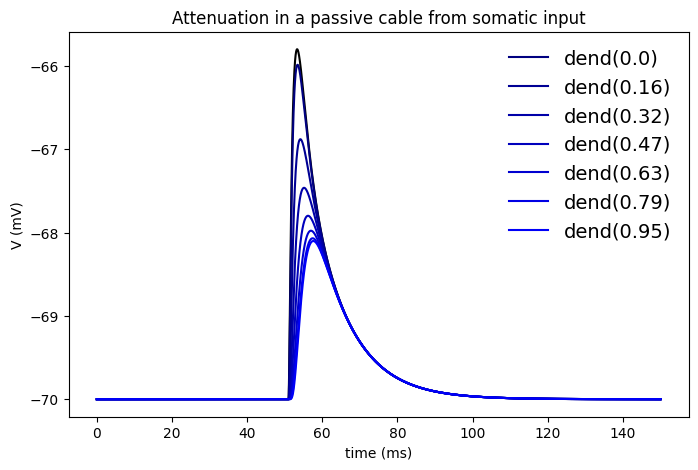

In [11]:
h.run();
# plot the results
plt.figure(figsize=(8,5))
plt.plot(t, soma_v, color="k")
for i,v in list(enumerate(dend_vs))[::3]:
    plt.plot(t, v, color=(0,0,0.5+0.5*i/len(dend_vs)), 
             label = 'dend('+str(round(i/len(dend_vs), 2))+')')
plt.legend(fontsize=14, frameon=False)
plt.xlabel("time (ms)")
plt.ylabel("V (mV)")
plt.title("Attenuation in a passive cable from somatic input")